In [12]:
import os
from PIL import Image

# Define the directory containing the images
#test_image = "BPS-Microscopy/DAPI_MASK_images"
image_dir = "BPS-Microscopy/train"

# List to store image sizes
image_sizes = []

# Count the number of DAPI images and get their sizes
dapi_image_count = 0
total_images = 0
# for filename in os.listdir(image_dir):
#     # if filename.endswith("_DAPI.tif"): this is for DAPI_MASK
#     if filename.endswith(".tif"):
#         dapi_image_count += 1
#         image_path = os.path.join(image_dir, filename)
#         with Image.open(image_path) as img:
#             image_sizes.append(img.size)
#     total_images += 1

# Get unique sizes and their counts
# unique_sizes = {size: image_sizes.count(size) for size in set(image_sizes)}

# print(f"Total number of images: {total_images}")
# print(f"Number of DAPI images: {dapi_image_count}")
# print("Unique image sizes and their counts:")
# for size, count in unique_sizes.items():
#     print(f"Size: {size}, Count: {count}")

#Number of train images
#Total number of images: 77178
#Number of DAPI images: 77177

#Results for DAPI_MASK_images
# Total number of images: 171505
# Number of DAPI images: 85752


(256, 256, 1)
Min value: 0.0, Max value: 1.0 TF
(256, 256, 1)
Min value: 166.0, Max value: 1122.0 tiff


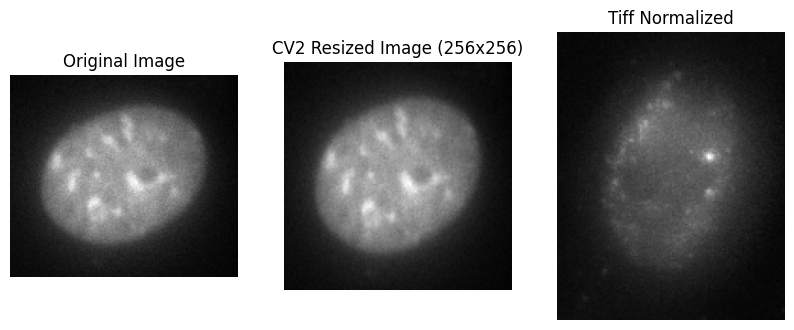

In [224]:
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import os
import tifffile as tiff
import numpy as np

# Function to load and preprocess image
def load_image_cv2(file_path, target_size=None):
    # Load the image using cv2
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    original = image
    
    # Convert the image to a tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    # original = image
    
    # Ensure the image has 3 dimensions (height, width, channels)
    if image.ndim == 2:
        image = tf.expand_dims(image, axis=-1)  # Add the channel dimension
    # original = image

    # Resize the image
    # image = tf.image.resize_with_pad(image, target_size[0], target_size[1], method=tf.image.ResizeMethod.GAUSSIAN)
    image = tf.image.resize(image, target_size)
    
    # Normalize the image to [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))

    print(image.shape)
    min_val = np.min(image)
    max_val = np.max(image)
    print(f"Min value: {min_val}, Max value: {max_val}", 'TF')
    
    return image, original

# Define the directory containing the images
#imager_dir = "BPS-Microscopy/DAPI_MASK_images"
image_dir = "BPS-Microscopy/train"

# Get an example image path
# image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('_DAPI.tif')]
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.tif')]
example_image_path = image_files[0]

# Load cv2 to tf image
target_size = (256, 256)  # Example target size
image_tensor, original = load_image_cv2(example_image_path, target_size)
print(image_tensor.shape)


# Load the image
tiff_image = tiff.imread(example_image_path)

# Function to normalize 16-bit image to 8-bit
def tiff_normalize_image(image):
    image = image.astype(np.float32)
    original = image
    min_val = np.min(image)
    max_val = np.max(image)
    print(f"Min value: {min_val}, Max value: {max_val}", 'tiff')
    
    # Normalize to [0, 1]
    image = (image - min_val) / (max_val - min_val)
    
    # Scale to [0, 255] and convert to uint8
    image = (image * 255).astype(np.uint8)
    
    return image

# Convert the image to 8-bit
tiff_normalized_image = tiff_normalize_image(tiff_image)


# Plot the original and resized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("CV2 Resized Image (256x256)")
plt.imshow(image_tensor[..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Tiff Normalized")
plt.imshow(tiff_normalized_image, cmap='gray')
plt.axis('off')

plt.show()


In [225]:
import pandas as pd

# Load the metadata from the Excel file
# metadata_path = 'BPS-Microscopy/DAPI_MASK_images/meta_DAPI_MASK.csv'
metadata_path = 'BPS-Microscopy/train/meta.csv'
metadata = pd.read_csv(metadata_path)

# Set particle_type to None where dose_Gy is 0
metadata.loc[metadata['dose_Gy'] == 0, 'particle_type'] = 'Control'

# Display the first few rows of the metadata
print(metadata.head())


# print(metadata[metadata['dose_Gy'] == 0].head())

                               filename  dose_Gy particle_type  \
0  P242_73665006707-A6_003_013_proj.tif     0.82            Fe   
1  P242_73665006707-A6_008_034_proj.tif     0.82            Fe   
2  P242_73665006707-A6_009_007_proj.tif     0.82            Fe   
3  P242_73665006707-A6_009_031_proj.tif     0.82            Fe   
4  P242_73665006707-A6_009_038_proj.tif     0.82            Fe   

   hr_post_exposure  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  


Class distribution in 'particle_type':
particle_type
Control    27478
X-ray      26925
Fe         22774
Name: count, dtype: int64

Class percentage distribution in 'particle_type':
particle_type
Control    35.603872
X-ray      34.887337
Fe         29.508791
Name: count, dtype: float64

Distribution of 'dose_Gy':
dose_Gy
0.00    27478
0.10    13585
0.30     9250
0.82    13524
1.00    13340
Name: count, dtype: int64

Percentage distribution of 'dose_Gy':
dose_Gy
0.00    35.603872
0.10    17.602394
0.30    11.985436
0.82    17.523355
1.00    17.284942
Name: count, dtype: float64

Distribution of 'hr_post_exposure':
hr_post_exposure
4     27609
24    27198
48    22370
Name: count, dtype: int64

Percentage distribution of 'hr_post_exposure':
hr_post_exposure
4     35.773611
24    35.241069
48    28.985319
Name: count, dtype: float64


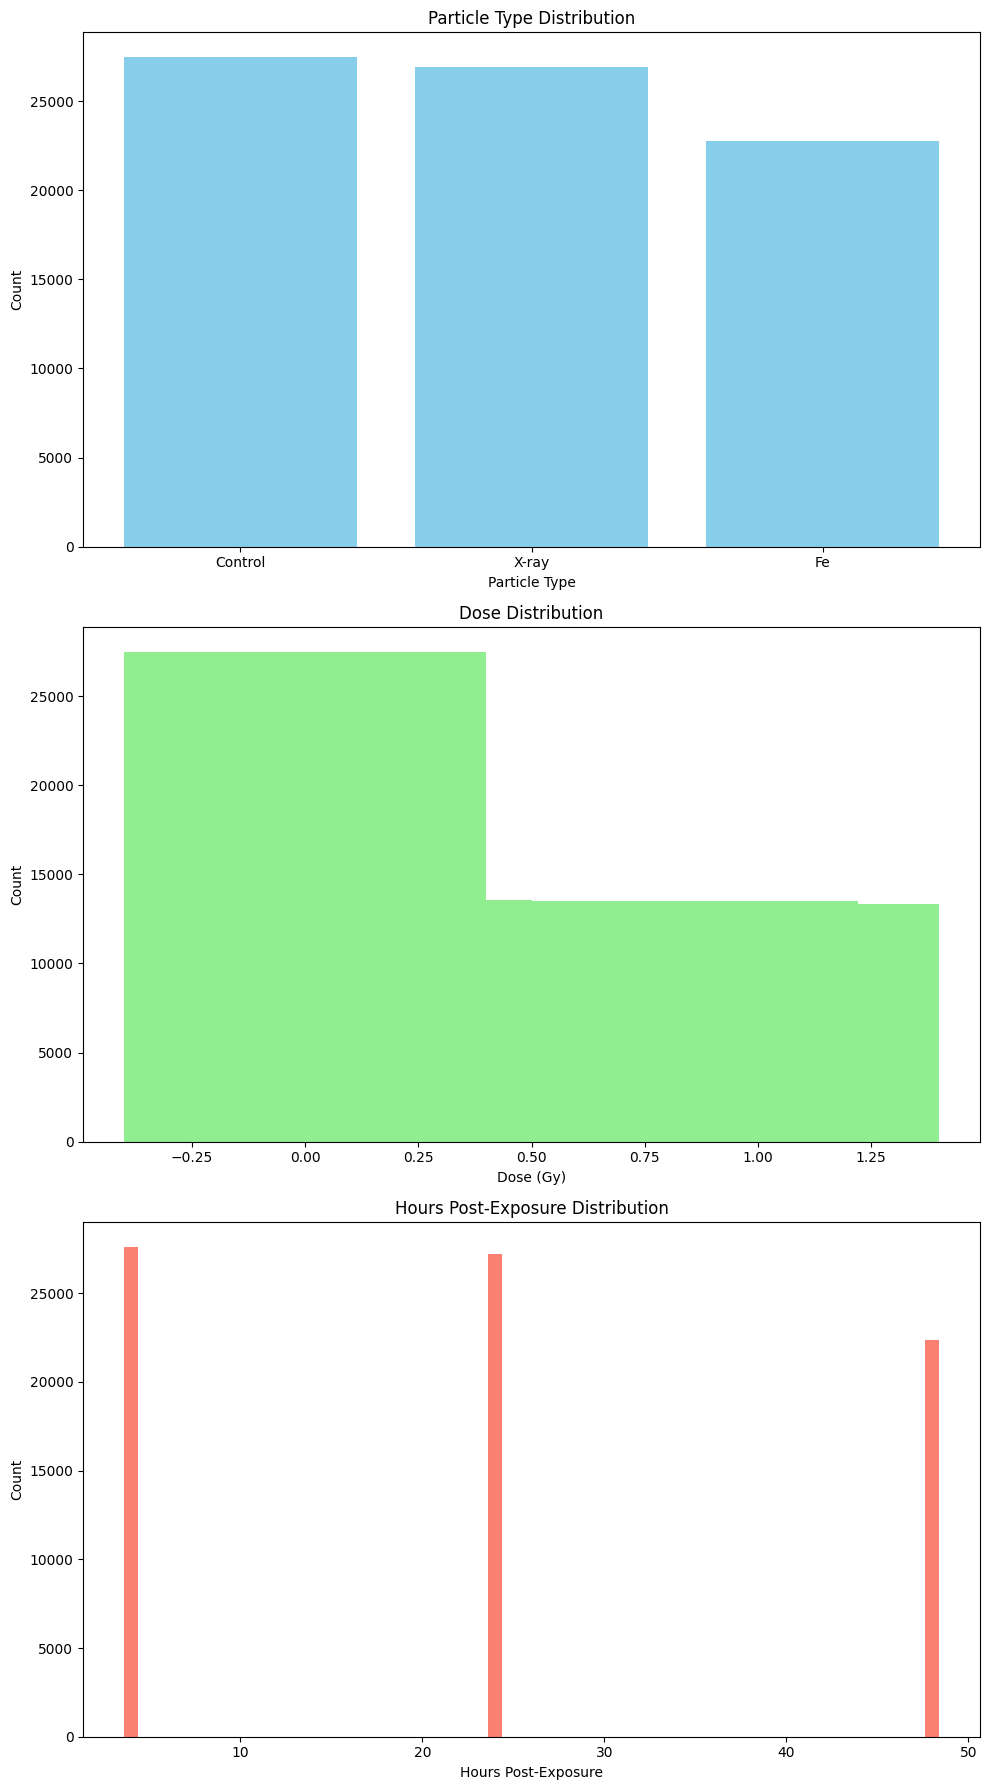

In [226]:
# Check for class imbalances in the 'particle_type' field
particle_type_counts = metadata['particle_type'].value_counts()
particle_type_percentages = particle_type_counts / len(metadata) * 100

print("Class distribution in 'particle_type':")
print(particle_type_counts)
print("\nClass percentage distribution in 'particle_type':")
print(particle_type_percentages)

# Check for distribution in the 'dose_Gy' field
dose_counts = metadata['dose_Gy'].value_counts().sort_index()
dose_percentages = dose_counts / len(metadata) * 100

print("\nDistribution of 'dose_Gy':")
print(dose_counts)
print("\nPercentage distribution of 'dose_Gy':")
print(dose_percentages)

# Check for distribution in the 'hr_post_exposure' field
hr_counts = metadata['hr_post_exposure'].value_counts().sort_index()
hr_percentages = hr_counts / len(metadata) * 100

print("\nDistribution of 'hr_post_exposure':")
print(hr_counts)
print("\nPercentage distribution of 'hr_post_exposure':")
print(hr_percentages)

# Plot the distributions for visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Particle type distribution
axs[0].bar(particle_type_counts.index, particle_type_counts.values, color='skyblue')
axs[0].set_title('Particle Type Distribution')
axs[0].set_xlabel('Particle Type')
axs[0].set_ylabel('Count')

# Dose distribution
axs[1].bar(dose_counts.index, dose_counts.values, color='lightgreen')
axs[1].set_title('Dose Distribution')
axs[1].set_xlabel('Dose (Gy)')
axs[1].set_ylabel('Count')

# Hours post exposure distribution
axs[2].bar(hr_counts.index, hr_counts.values, color='salmon')
axs[2].set_title('Hours Post-Exposure Distribution')
axs[2].set_xlabel('Hours Post-Exposure')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [227]:
import os

# Add the full path to the filenames in the metadata
metadata['filepath'] = metadata['filename'].apply(lambda x: os.path.join(image_dir, x))

# Filter only the valid DAPI images
# metadata = metadata[metadata['filename'].str.endswith('_DAPI.tif')]
metadata = metadata[metadata['filename'].str.endswith('.tif')]

# Display the first few rows of the updated metadata
metadata.head()


,filename,dose_Gy,particle_type,hr_post_exposure,filepath
0,P242_73665006707-A6_003_013_proj.tif,0.82,Fe,4,BPS-Microscopy/train/P242_73665006707-A6_003_0...
1,P242_73665006707-A6_008_034_proj.tif,0.82,Fe,4,BPS-Microscopy/train/P242_73665006707-A6_008_0...
2,P242_73665006707-A6_009_007_proj.tif,0.82,Fe,4,BPS-Microscopy/train/P242_73665006707-A6_009_0...
3,P242_73665006707-A6_009_031_proj.tif,0.82,Fe,4,BPS-Microscopy/train/P242_73665006707-A6_009_0...
4,P242_73665006707-A6_009_038_proj.tif,0.82,Fe,4,BPS-Microscopy/train/P242_73665006707-A6_009_0...


In [228]:
import tensorflow as tf

def load_image(image_path, target_size=(256, 256)):
    # Convert tensor to numpy string
    image_path = image_path.numpy().decode('utf-8')
    # Load the image using cv2
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    # Convert the image to a tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    # Ensure the image has 3 dimensions (height, width, channels)
    if image.ndim == 2:
        image = tf.expand_dims(image, axis=-1)  # Add the channel dimension
    # Resize the image
    image = tf.image.resize(image, target_size)
    # Normalize the image to [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    return image

def process_metadata(row):
    # Extract relevant fields from the row
    dose = tf.cast(row['dose_Gy'], tf.float32)
    # Particle Type
    particle_type_str = row['particle_type']
    particle_type = tf.cond(
        tf.equal(particle_type_str, 'Control'),
        lambda: tf.constant(0.0, dtype=tf.float32),
        lambda: tf.cond(
            tf.equal(particle_type_str, 'X-ray'),
            lambda: tf.constant(1.0, dtype=tf.float32),
            lambda: tf.constant(2.0, dtype=tf.float32)
        )
    )
    hr_post_exposure = tf.cast(row['hr_post_exposure'], tf.float32)
    return dose, particle_type, hr_post_exposure

def load_and_preprocess_from_path_label(row):
    # Use tf.py_function to ensure compatibility with tf.data.Dataset
    image = tf.py_function(func=load_image, inp=[row['filepath']], Tout=tf.float32)
    # Set shape information for the tensor
    image.set_shape([256, 256, 1])
    dose, particle_type, hr_post_exposure = process_metadata(row)
    return image, (dose, particle_type, hr_post_exposure)

# Create a TensorFlow Dataset from the DataFrame
dataset = tf.data.Dataset.from_tensor_slices(dict(metadata))
dataset = dataset.map(lambda row: load_and_preprocess_from_path_label(row))

# Batch and prefetch the dataset
batch_size = 32
dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [260]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Split the metadata into training and validation sets
train_metadata, val_metadata = train_test_split(metadata, test_size=0.2, random_state=42)

def create_model():
    inputs = layers.Input(shape=(256, 256, 1))
    
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    output_dose = layers.Dense(1, activation='relu', name='dose_output')(x)
    output_particle = layers.Dense(3, activation='softmax', name='particle_output')(x)  # Multi-class classification
    output_hr = layers.Dense(1, name='hr_output')(x)
    
    model = models.Model(inputs=inputs, outputs=[output_dose, output_particle, output_hr])
    model.compile(optimizer='adam', 
                  loss={'dose_output': 'mse', 'particle_output': 'sparse_categorical_crossentropy', 'hr_output': 'mse'},
                  metrics={'dose_output': 'mae', 'particle_output': 'sparse_categorical_accuracy', 'hr_output': 'mae'})
    
    return model

model = create_model()
model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 254, 254,  │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 254, 254,  │        128 │ conv2d_29[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_29    │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 125, 125,  │     18,496 │ max_pooling2d_29… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        256 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_30    │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 60, 60,    │     73,856 │ max_pooling2d_30… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        512 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_31    │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 28, 28,    │    295,168 │ max_pooling2d_31… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      1,024 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 12, 12,    │  1,180,160 │ max_pooling2d_32… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │      2,048 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 6, 6, 512) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 18432)     │          0 │ max_pooling2d_33

 Total params: 6,332,293 (24.16 MB)

 Trainable params: 6,330,309 (24.15 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Train the model
# history = model.fit(dataset, epochs=5)

# Create a TensorFlow Dataset from the DataFrame
train_dataset = tf.data.Dataset.from_tensor_slices(dict(train_metadata))
train_dataset = train_dataset.map(lambda row: load_and_preprocess_from_path_label(row))
train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(dict(val_metadata))
val_dataset = val_dataset.map(lambda row: load_and_preprocess_from_path_label(row))
val_dataset = val_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3536s 824ms/step - dose_output_mae: 0.6309 - hr_output_mae: 16.6202 - loss: 407.6751 - particle_output_sparse_categorical_accuracy: 0.3415 - val_dose_output_mae: 0.3710 - val_hr_output_mae: 17.8854 - val_loss: 488.0709 - val_particle_output_sparse_categorical_accuracy: 0.3544 - learning_rate: 0.0010
Epoch 2/3
2929/4288 ━━━━━━━━━━━━━━━━━━━━ 17:33 775ms/step - dose_output_mae: 0.3711 - hr_output_mae: 15.7796 - loss: 352.5174 - particle_output_sparse_categorical_accuracy: 0.3398

KeyError: 'particle_output_mae'

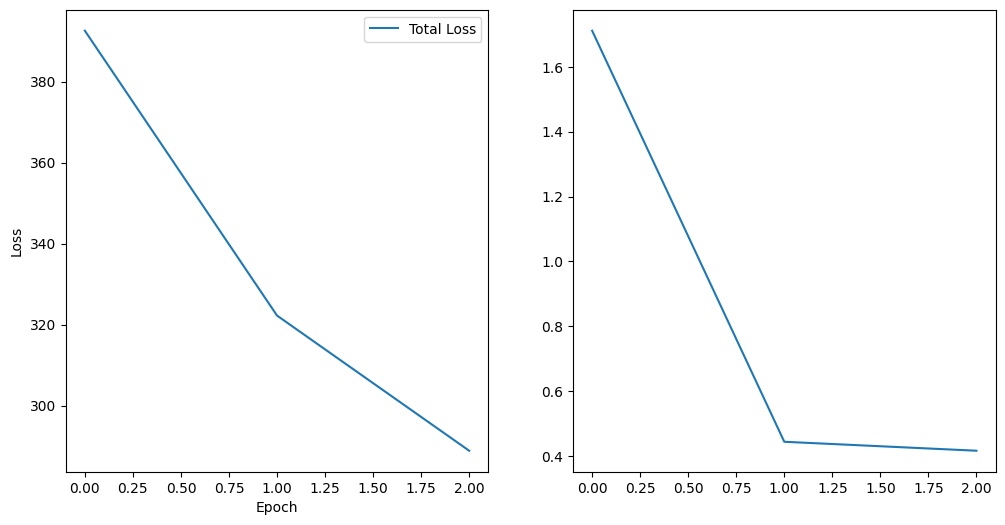

In [232]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot overall loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE for each output
plt.subplot(1, 2, 2)
plt.plot(history.history['dose_output_mae'], label='Dose MAE')
plt.plot(history.history['particle_output_mae'], label='Particle MAE')
# plt.plot(history.history['hr_output_mae'], label='HR MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [233]:
# Test on unseen data

# Define the paths
image_folder = 'BPS-Microscopy/DAPI_MASK_images'
meta_csv_path = 'BPS-Microscopy//DAPI_MASK_images/meta_DAPI_MASK.csv'

# Load the metadata CSV
metadata = pd.read_csv(meta_csv_path)

# Set particle_type to None where dose_Gy is 0
metadata.loc[metadata['dose_Gy'] == 0, 'particle_type'] = 'Control'

# Filter the DataFrame to include only files ending with "_DAPI.tif"
metadata['filepath'] = image_folder + '/' + metadata['filename']
subset_metadata = metadata[metadata['filename'].str.endswith('_DAPI.tif')].head(100)  # Select a subset of 100 files for testing

In [234]:
# Convert the DataFrame to a dictionary
subset_metadata_dict = subset_metadata.to_dict(orient='list')

# Create a TensorFlow Dataset from the DataFrame
test_dataset = tf.data.Dataset.from_tensor_slices(subset_metadata_dict)
test_dataset = test_dataset.map(lambda row: load_and_preprocess_from_path_label(row))

# Batch the dataset
batch_size = 32
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [235]:
# Initialize lists to store results
true_dose = []
pred_dose = []
true_particle = []
pred_particle = []
true_hr = []
pred_hr = []

# Iterate over the test dataset
for images, labels in test_dataset:  
    dose, particle_type, hr_post_exposure = labels
    predictions = model.predict(images)
    
    # Extract predictions
    pred_dose_batch, pred_particle_batch, pred_hr_batch = predictions
    
    # Store the true values and predictions
    true_dose.extend(dose.numpy())
    pred_dose.extend(pred_dose_batch)
    true_particle.extend(particle_type.numpy())
    pred_particle.extend(tf.argmax(pred_particle_batch, axis=1).numpy())  # Get the predicted class
    true_hr.extend(hr_post_exposure.numpy())
    pred_hr.extend(pred_hr_batch)

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, accuracy_score

# Mean Absolute Error for dose
dose_mae = mean_absolute_error(true_dose, pred_dose)
print(f'Dose MAE: {dose_mae}')

# Accuracy for particle type
particle_accuracy = accuracy_score(true_particle, pred_particle)
print(f'Particle Type Accuracy: {particle_accuracy}')

# Mean Absolute Error for hours post-exposure
hr_mae = mean_absolute_error(true_hr, pred_hr)
print(f'Hours Post-Exposure MAE: {hr_mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Dose MAE: 0.07222279906272888
Particle Type Accuracy: 1.0
Hours Post-Exposure MAE: 20.43920135498047


2024-07-04 20:06:57.955763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [258]:
import random
import cv2
import tensorflow as tf
import numpy as np

# Select a random index
# random_index = random.randint(0, len(subset_metadata) - 1)

# Get the random row
# random_row = subset_metadata.iloc[random_index]

# Extract the filepath
# random_image_path = random_row['filepath']
# print(f"Selected image: {random_image_path}")

# actual_dose = random_row['dose_Gy']
# actual_particle_type = random_row['particle_type']
# actual_hr_post_exposure = random_row['hr_post_exposure']

# Select the row corresponding to the specific image path
image_path = 'BPS-Microscopy/DAPI_MASK_images/P251_73665707362-C7_003_004_DAPI.tif'
selected_row = metadata[metadata['filepath'] == image_path].iloc[0]
# print(selected_row)
print(f"Selected image: {image_path}")

# Get the actual values for comparison
actual_dose = selected_row['dose_Gy']
actual_particle_type = selected_row['particle_type']
actual_hr_post_exposure = selected_row['hr_post_exposure']

# print(f"Actual Dose: {actual_dose}")
# print(f"Actual Particle Type: {actual_particle_type}")
# print(f"Actual Hours Post-Exposure: {actual_hr_post_exposure}")

def preprocess_single_image(image_path):
    # Load the image using cv2
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Convert the image to a tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Ensure the image has 3 dimensions (height, width, channels)
    if image.ndim == 2:
        image = tf.expand_dims(image, axis=-1)  # Add the channel dimension
    
    # Resize the image
    image = tf.image.resize(image, (256, 256))
    
    # Normalize the image to [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    
    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)
    
    return image

# Preprocess the selected image
preprocessed_image = preprocess_single_image(random_image_path)

# Assuming you have your trained model loaded as `model`
# model = ... (load your trained model)

# Make predictions
predictions = model.predict(preprocessed_image)

# Extract predictions
pred_dose, pred_particle_type, pred_hr_post_exposure = predictions

# Convert predictions from arrays to scalars
pred_dose = pred_dose[0]
pred_particle_type = pred_particle_type[0]
pred_hr_post_exposure = pred_hr_post_exposure[0]

# Convert particle type probabilities to percentages
pred_particle_type_percentages = [f"{p*100:.2f}%" for p in pred_particle_type]

# Get the predicted class for particle type
pred_particle_type_class = np.argmax(pred_particle_type)

# Class names for easier reading
particle_type_names = ['Control', 'X-ray', 'Fe']

# Print predictions in a readable format
print(f"\nPredicted Dose: {pred_dose}")
print(f"Predicted Particle Type Probabilities: {pred_particle_type_percentages}")
print(f"Predicted Particle Type: {particle_type_names[pred_particle_type_class]}")
print(f"Predicted Hours Post-Exposure: {pred_hr_post_exposure}")

# Compare with actual values
print(f"\nActual Dose: {actual_dose}")
print(f"Actual Particle Type: {actual_particle_type}")
print(f"Actual Hours Post-Exposure: {actual_hr_post_exposure}")


Selected image: BPS-Microscopy/DAPI_MASK_images/P251_73665707362-C7_003_004_DAPI.tif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Predicted Dose: [-0.03599888]
Predicted Particle Type Probabilities: ['49.47%', '18.65%', '31.88%']
Predicted Particle Type: Control
Predicted Hours Post-Exposure: [26.717674]

Actual Dose: 0.82
Actual Particle Type: Fe
Actual Hours Post-Exposure: 48


In [257]:
import random
import cv2
import tensorflow as tf
import numpy as np

# Select a random index
random_index = random.randint(0, len(subset_metadata) - 1)

# Get the random row
random_row = subset_metadata.iloc[random_index]

# Extract the filepath
random_image_path = random_row['filepath']
print(f"Selected image: {random_image_path}")

actual_dose = random_row['dose_Gy']
actual_particle_type = random_row['particle_type']
actual_hr_post_exposure = random_row['hr_post_exposure']

# Select the row corresponding to the specific image path
# image_path = 'BPS-Microscopy/DAPI_MASK_images/P280_73668439105-A7_016_015_DAPI.tif'
# selected_row = metadata[metadata['filepath'] == image_path].iloc[0]
# # print(selected_row)
# print(f"Selected image: {image_path}")

# Get the actual values for comparison
# actual_dose = selected_row['dose_Gy']
# actual_particle_type = selected_row['particle_type']
# actual_hr_post_exposure = selected_row['hr_post_exposure']

# print(f"Actual Dose: {actual_dose}")
# print(f"Actual Particle Type: {actual_particle_type}")
# print(f"Actual Hours Post-Exposure: {actual_hr_post_exposure}")

def preprocess_single_image(image_path):
    # Load the image using cv2
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Convert the image to a tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Ensure the image has 3 dimensions (height, width, channels)
    if image.ndim == 2:
        image = tf.expand_dims(image, axis=-1)  # Add the channel dimension
    
    # Resize the image
    image = tf.image.resize(image, (256, 256))
    
    # Normalize the image to [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    
    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)
    
    return image

# Preprocess the selected image
preprocessed_image = preprocess_single_image(random_image_path)

# Assuming you have your trained model loaded as `model`
# model = ... (load your trained model)

# Make predictions
predictions = model.predict(preprocessed_image)

# Extract predictions
pred_dose, pred_particle_type, pred_hr_post_exposure = predictions

# Convert predictions from arrays to scalars
pred_dose = pred_dose[0]
pred_particle_type = pred_particle_type[0]
pred_hr_post_exposure = pred_hr_post_exposure[0]

# Convert particle type probabilities to percentages
pred_particle_type_percentages = [f"{p*100:.2f}%" for p in pred_particle_type]

# Get the predicted class for particle type
pred_particle_type_class = np.argmax(pred_particle_type)

# Class names for easier reading
particle_type_names = ['Control', 'X-ray', 'Fe']

# Print predictions in a readable format
print(f"\nPredicted Dose: {pred_dose}")
print(f"Predicted Particle Type Probabilities: {pred_particle_type_percentages}")
print(f"Predicted Particle Type: {particle_type_names[pred_particle_type_class]}")
print(f"Predicted Hours Post-Exposure: {pred_hr_post_exposure}")

# Compare with actual values
print(f"\nActual Dose: {actual_dose}")
print(f"Actual Particle Type: {actual_particle_type}")
print(f"Actual Hours Post-Exposure: {actual_hr_post_exposure}")


Selected image: BPS-Microscopy/DAPI_MASK_images/P244_73665165741-A6_001_043_DAPI.tif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Predicted Dose: [-0.03599888]
Predicted Particle Type Probabilities: ['49.47%', '18.65%', '31.88%']
Predicted Particle Type: Control
Predicted Hours Post-Exposure: [26.717674]

Actual Dose: 0.0
Actual Particle Type: Control
Actual Hours Post-Exposure: 4
